#SCC - ICMC - USP
#**MBA EM INTELIGENCIA ARTIFICIAL E BIGDATA**
## **CURSO 2 - CD, AM E DM**
## **PROFA. ROSELI AP. FRANCELIN ROMERO**
---
## **Exemplo sobre Correlação**

#**OBJETIVOS**:
# Correlação, Covariância e visualização


...



## Vamos considerar neste exercicio o conjunto iris modificado

In [ ]:
import pandas as pd
import numpy as np
iris = pd.read_csv('/content/iris_modif_novo.data', index_col=0)
iris

,A,B,C,D,E,F
0,4.9,3.0,1.4,30.0,0.2,Iris-setosa
1,4.7,3.2,1.3,32.0,0.2,Iris-setosa
2,4.6,3.1,1.5,31.0,0.2,Iris-setosa
3,5.0,3.6,1.4,36.0,0.2,Iris-setosa
4,5.4,3.9,1.7,39.0,0.4,Iris-setosa
...,...,...,...,...,...,...
144,6.7,3.0,5.2,30.0,2.3,Iris-virginica
145,6.3,2.5,5.0,25.0,1.9,Iris-virginica
146,6.5,3.0,5.2,30.0,2.0,Iris-virginica
147,6.2,3.4,5.4,34.0,2.3,Iris-virginica


### **Questão 01**.
##* Calcule a matriz de covariância (`np.cov`)
##* Crie um heatmap (`sns.heatmap`) para cada matriz
##* Dica: Atente-se ao atributo rowvar

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]
#Retirando a coluna do atributo alvo, pois, desejamos conhecer o relacionamento entre os atributos apenas
iris_novo = iris.drop(columns=["F"])
iris_novo.head()

,A,B,C,D,E
0,4.9,3.0,1.4,30.0,0.2
1,4.7,3.2,1.3,32.0,0.2
2,4.6,3.1,1.5,31.0,0.2
3,5.0,3.6,1.4,36.0,0.2
4,5.4,3.9,1.7,39.0,0.4


In [ ]:
iris_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       149 non-null    float64
 1   B       149 non-null    float64
 2   C       149 non-null    float64
 3   D       149 non-null    float64
 4   E       149 non-null    float64
dtypes: float64(5)
memory usage: 7.0 KB


In [ ]:
#Convertendo para float todos os valores
#iris_novo = np.float64(iris_novo)
iris_novo_values = np.float64(iris_novo.values) # Extract values from DataFrame and convert to float
cov_matrix = np.cov(iris_novo_values, rowvar=False)
#cov_matrix = np.cov(iris_novo, rowvar=False)
#iris_novo

<Axes: >

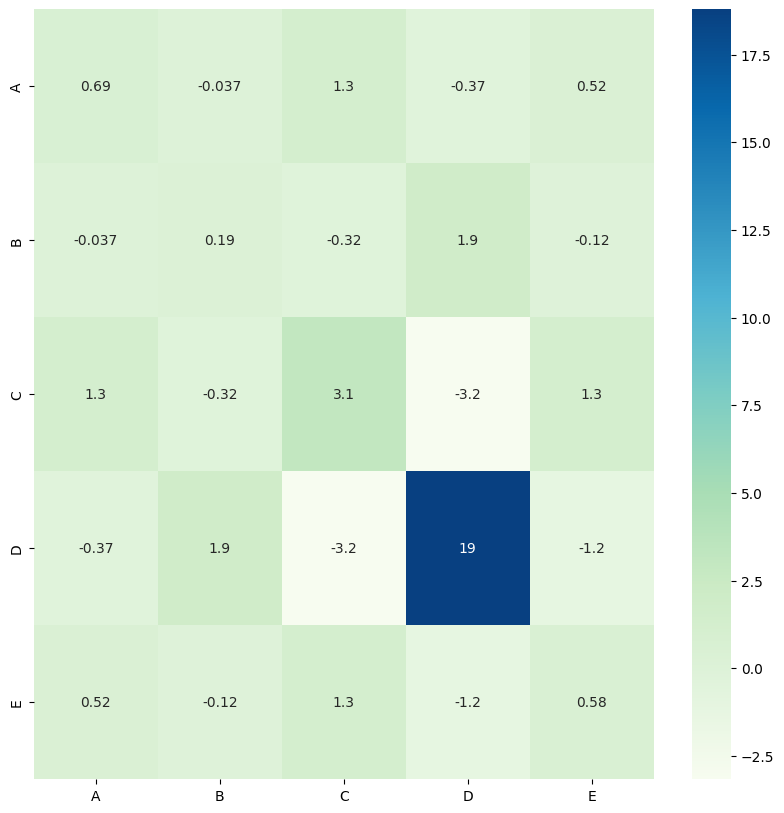

In [ ]:
sns.heatmap(cov_matrix,
            annot=True,
            xticklabels=iris.columns[:-1],
            yticklabels=iris.columns[:-1],
            cmap="GnBu"
)

### **Questão 02**.

##Agora calcule a matriz de correlação (`pandas.DataFrame.corr` ou `np.corrcoef`) utilizando o método de Pearson, gerando um heatmap da matriz.

<Axes: >

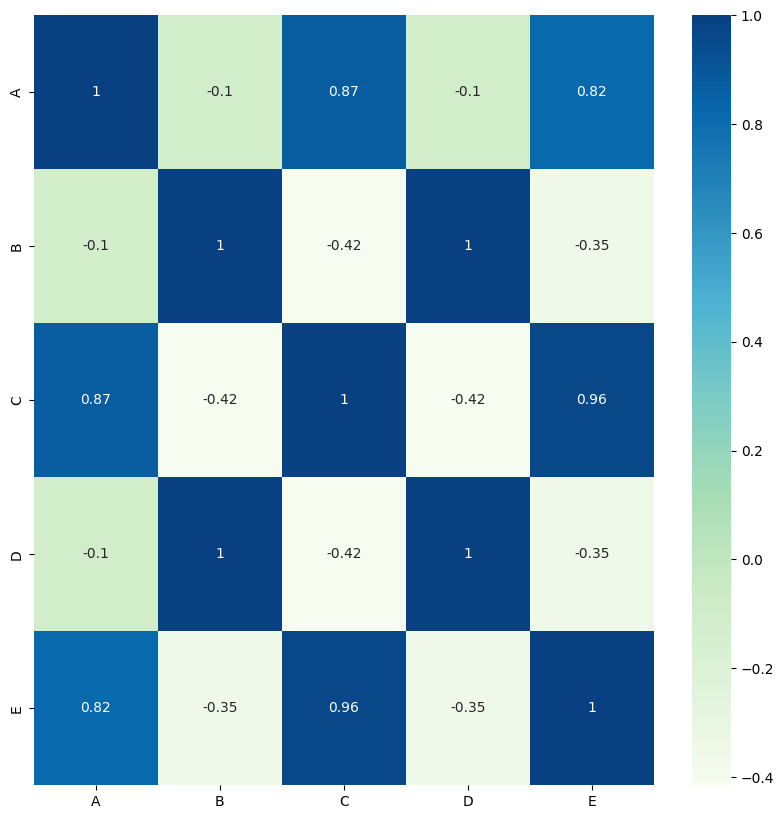

In [ ]:
#Calculo da correlação entre as variáveis
sns.heatmap(iris_novo.corr(),
            annot=True,
#            xticklabels=iris_novo_values.columns[:-1],
#            yticklabels=iris_novo_values.columns[:-1],
            xticklabels=iris_novo.columns,
            yticklabels=iris_novo.columns,
            cmap="GnBu"
)

### **Questão 03**.

##O método da Questão 2 apresenta alguma vantagem com relação ao método da Questão 1?

Resposta: Sim. A análise de covariância é sensível à escala dos valores analisados e este fato fica visível na observação do heatmap. Para a covariância, o valor da variância do atributo "D" se destaca bastante dos demais, prejudicando a análise dos demais atributos. Já a análise de correlação, por ter valores limitados entre -1 e 1 não apresenta o problema da covariância, e seu heatmap fica mais "uniforme". Na análise de correlação, como os valores estão normalizados é mais fácil identificar a "intensidade" das relações.

### **Questão 04**.

##  Utilizando o resultado da matriz de correlação, verifique se existe um atributo redundante nessa base e crie um novo `Dataframe` sem ele e justifique.

Resposta: Observando a matriz de correlação, podemos observar que os atributos 'B' e 'D' possuem correlação máxima. Assim, podemos concluir que o atributo 'D', por exemplo, é redundante. Observando seus valores fica claro que os valores do atributo 'D' correspondem aos valores do atributo 'B' multiplicados por 10.

In [ ]:
iris_novo = iris_novo.drop(columns=["D"])
iris_novo.head()

,A,B,C,E
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


### **Questão 05**.

##Agora calcule as matrizes de correlação utilizando os métodos de Kendall e Spearman. Exiba seus heatmaps.

<Axes: >

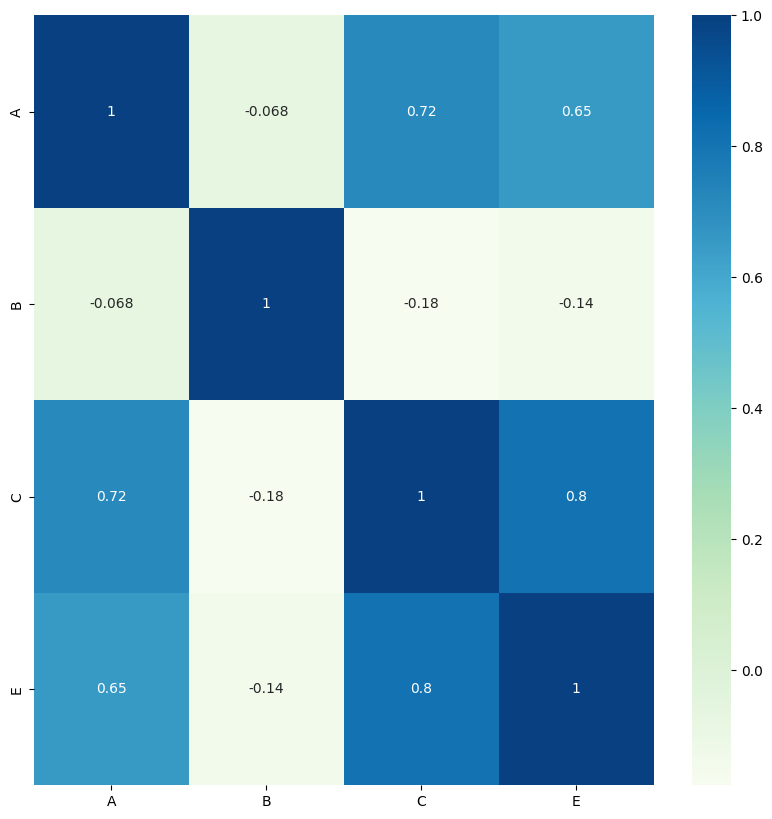

In [ ]:
# Correlação de Kendall

sns.heatmap(iris_novo.corr(method="kendall"),
            annot=True,
            cmap="GnBu"
)

<Axes: >

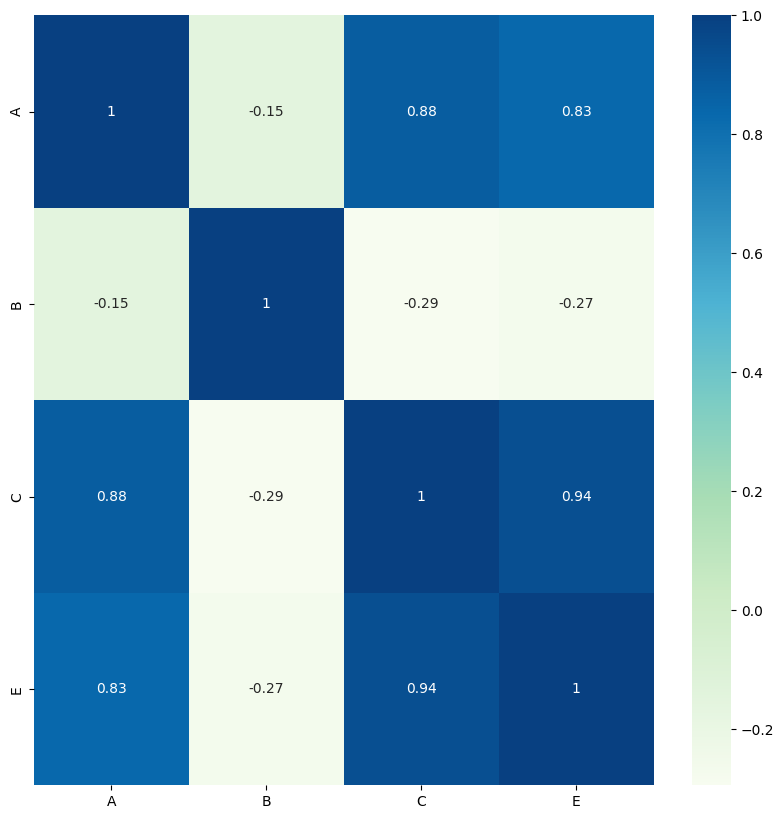

In [ ]:
# Correlação de Spearman
sns.heatmap(iris_novo.corr(method="spearman"),
            annot=True,
            cmap="GnBu"
)

### **Questão 06**.

##Determine os pares de variáveis que apresentam maior e menor correlação de spearman. Depois produza scatter plots (`matplotlib.pyplot.scatter`) desses pares de variáveis. Comente como os dados estão distribuídos nos gráficos.

Text(0.5, 1.0, 'Menor correlação')

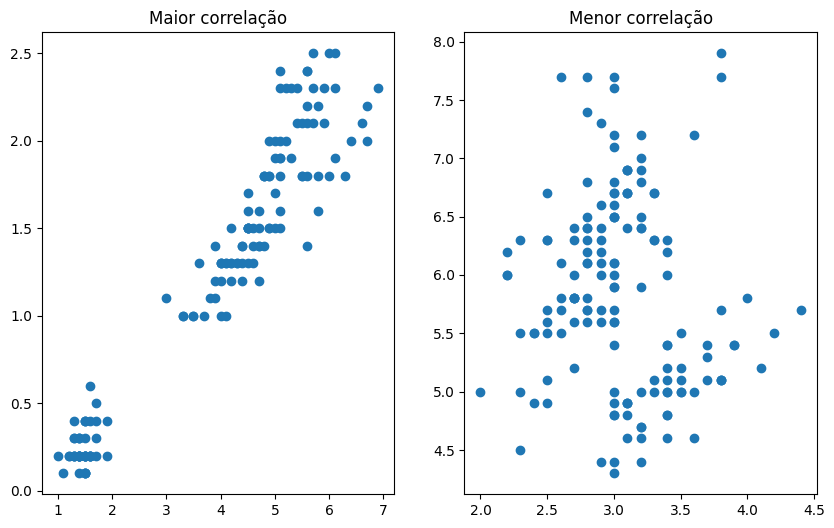

In [ ]:
# Através da matriz de correlação, podemos observar que os atributos
# 'C' e 'E' possuem maior correlação enquanto que os 'B' e 'A'
# possuem menor correlação em módulo.

fig, axs = plt.subplots(1, 2, figsize=(10,6))
axs[0].scatter(iris['C'], iris['E'])
axs[0].set_title('Maior correlação')

axs[1].scatter(iris['B'], iris['A'])
axs[1].set_title('Menor correlação')


### Resposta: Considerando o módulo das correlações, para os atributos com maior correlação a distribuição dos pontos se assemelha a uma reta. Por outro lado, para os atributos de menor módulo de correlação, a distribuição dos pontos fica mais esparsa.



 <!-- No gráfico dos atributos com maior correlação, a distribuição dos pontos se aproxima de uma reta de inclinação positiva, enquanto que no gráfico dos atributos com menor correlação a distribuição dos pontos é mais esparsa. Além disto, como a menor correlação é negativa a distribuição dos pontos se assemelha a uma reta de inclinação negativa. Com a análise das distribuições e dos valores de correlação, é possível identificar se há ou não uma dependência linear entre os atributos avaliados. -->

### **Questão 07**.

##Produza um diagrama de torta (`matplotlib.pyplot.pie`) mostrando a distribuição das 3 classes

In [ ]:
counts_df = iris["F"].value_counts()
counts_df

F
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x788a652b4a30>,
 [Text(0.5432911950694249, 0.9564699040534608, 'Iris-versicolor'),
  Text(-1.0997554996541645, -0.02319139884567615, 'Iris-virginica'),
  Text(0.5633358654770906, -0.9448029967496809, 'Iris-setosa')],
 [Text(0.2963406518560499, 0.521710856756433, '33.56'),
  Text(-0.5998666361749987, -0.012649853915823352, '33.56'),
  Text(0.30727410844204933, -0.5153470891361895, '32.89')])

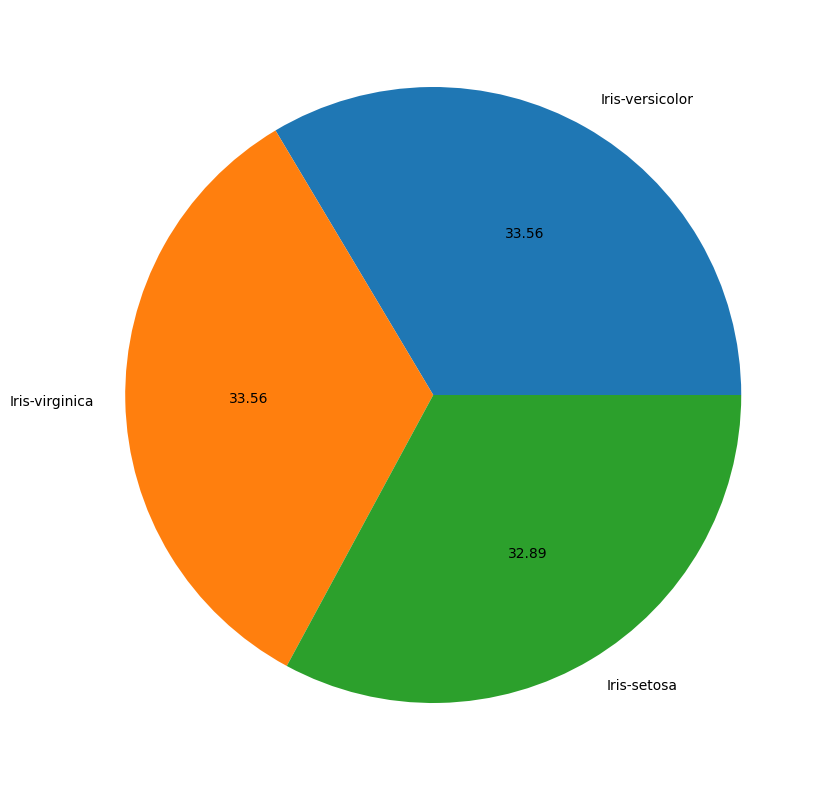

In [ ]:
plt.pie(counts_df.values, labels=counts_df.index, autopct='%.2f')